# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
print("Max DAYS_BIRTH: "+str((app_train['DAYS_BIRTH']/365).max()))
print("Min DAYS_BIRTH: "+str((app_train['DAYS_BIRTH']/365).min()))

app_train['equal_width_age'] = pd.cut((app_train['DAYS_BIRTH'] / 365), 10)
app_train['equal_freq_age'] = pd.qcut((app_train['DAYS_BIRTH'] / 365), 10)

gap = np.linspace(20, 70, 11, dtype='int')
lbs = ['(%d Y, %d Y]'%(gap[i], gap[i+1]) for i in range(len(gap)-1)]
app_train['DAYS_BIRTH_grp'] = pd.cut((app_train['DAYS_BIRTH'] / 365), gap, labels=lbs)
app_train['DAYS_BIRTH_grp'].value_counts()

Max DAYS_BIRTH: 69.12054794520547
Min DAYS_BIRTH: 20.517808219178082


(35 Y, 40 Y]    42868
(40 Y, 45 Y]    41406
(30 Y, 35 Y]    39440
(45 Y, 50 Y]    35135
(50 Y, 55 Y]    34942
(55 Y, 60 Y]    33120
(25 Y, 30 Y]    32862
(60 Y, 65 Y]    27476
(20 Y, 25 Y]    12159
(65 Y, 70 Y]     8103
Name: DAYS_BIRTH_grp, dtype: int64

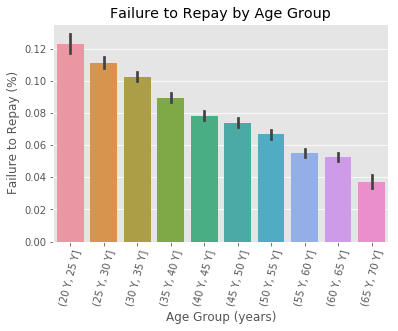

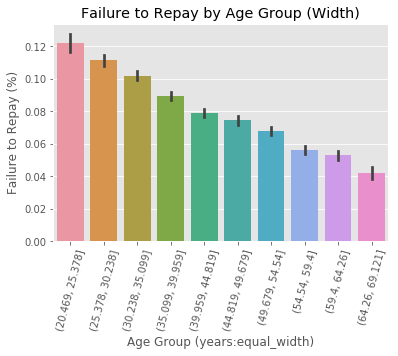

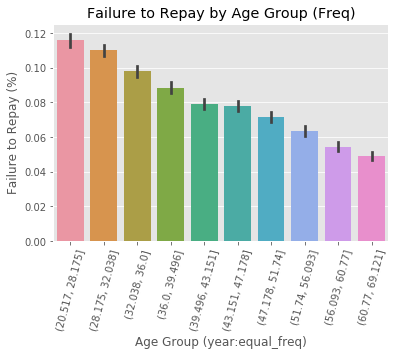

In [6]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

sns.barplot(app_train['DAYS_BIRTH_grp'], app_train['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');
plt.show()

sns.barplot(app_train['equal_width_age'], app_train['TARGET'])
plt.xticks(rotation = 75); plt.xlabel('Age Group (years:equal_width)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group (Width)');
plt.show()

sns.barplot(app_train['equal_freq_age'], app_train['TARGET'])
plt.xticks(rotation = 75); plt.xlabel('Age Group (year:equal_freq)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group (Freq)')
plt.show()

### DAYS_EMPLOYED & TARGET

Max DAYS_EMPLOYED: 49.07397260273972
Min DAYS_EMPLOYED: -0.0


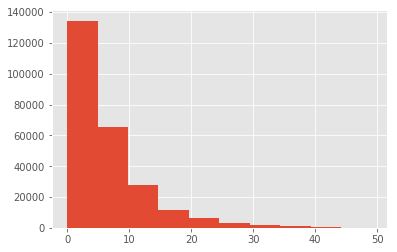

In [7]:
(app_train['DAYS_EMPLOYED']/ (-365)).hist()
print("Max DAYS_EMPLOYED: "+str((app_train['DAYS_EMPLOYED']/(-365)).max()))
print("Min DAYS_EMPLOYED: "+str((app_train['DAYS_EMPLOYED']/(-365)).min()))

(0 Y, 5 Y]      136309
(5 Y, 10 Y]      64872
(10 Y, 15 Y]     27549
(15 Y, 20 Y]     10849
(20 Y, 25 Y]      6243
(25 Y, 30 Y]      3308
(30 Y, 35 Y]      1939
(35 Y, 40 Y]       832
(40 Y, 45 Y]       210
(45 Y, 50 Y]        24
Name: DAYS_EMPLOYED_grp, dtype: int64


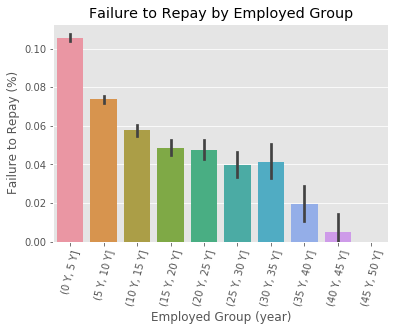

In [8]:
gap = np.linspace(0, 50, 11, dtype='int')
lbs = ['(%d Y, %d Y]'%(gap[i], gap[i+1]) for i in range(len(gap)-1)]
app_train['DAYS_EMPLOYED_grp'] = pd.cut(app_train['DAYS_EMPLOYED']/(-365), gap, labels=lbs)

print(app_train['DAYS_EMPLOYED_grp'].value_counts())


sns.barplot(app_train['DAYS_EMPLOYED_grp'], app_train['TARGET'])
plt.xticks(rotation = 75); plt.xlabel('Employed Group (year)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Employed Group')
plt.show()

### AMT_INCOME_TOTAL & AMT_CREDIT

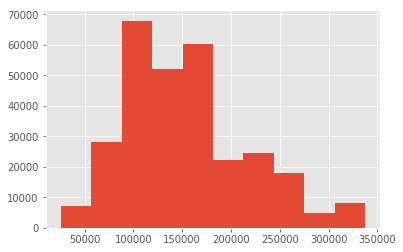

Max AMT_INCOME_TOTAL: 337500.0
Min AMT_INCOME_TOTAL: 25650.0

Most Positive Correlations:
 FLOORSMIN_AVG       0.139860
AMT_CREDIT          0.156870
AMT_GOODS_PRICE     0.159610
AMT_ANNUITY         0.191657
AMT_INCOME_TOTAL    1.000000
Name: AMT_INCOME_TOTAL, dtype: float64

Most Negative Correlations:
 OWN_CAR_AGE                   -0.117273
REGION_RATING_CLIENT_W_CITY   -0.091735
REGION_RATING_CLIENT          -0.085465
DAYS_EMPLOYED_ANOM            -0.064038
FLAG_DOCUMENT_6               -0.045878
Name: AMT_INCOME_TOTAL, dtype: float64


In [9]:
app_train['AMT_INCOME_TOTAL'][app_train['AMT_INCOME_TOTAL']<=app_train['AMT_INCOME_TOTAL'].quantile(0.95)].hist()
plt.show()

print("Max AMT_INCOME_TOTAL: "+str(app_train['AMT_INCOME_TOTAL'].quantile(0.95)))
print("Min AMT_INCOME_TOTAL: "+str(app_train['AMT_INCOME_TOTAL'].min()))

correlations = app_train.corr()['AMT_INCOME_TOTAL'].sort_values()
print('\nMost Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))


(120K, 140K]    47038
(100K, 120K]    39639
(80K, 100K]     36335
(140K, 160K]    32752
(160K, 180K]    32457
(220K, 240K]    22652
(200K, 220K]    19667
(60K, 80K]      18811
(260K, 280K]    11950
(40K, 60K]       7589
(240K, 260K]     6890
(300K, 320K]     6598
(280K, 300K]     4017
(180K, 200K]     4012
(320K, 340K]     2106
(20K, 40K]        963
(360K, 380K]        0
(340K, 360K]        0
(380K, 400K]        0
Name: INCOME_grp, dtype: int64


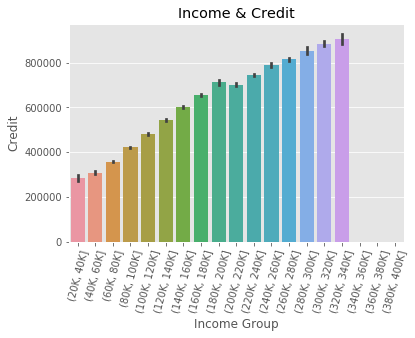

In [10]:
lower, higher, n_bins = 20000, 400000, 20

gap = np.linspace(lower, higher, n_bins, dtype='int')

lbs = ['(%dK, %dK]'%(gap[i]/1000, gap[i+1]/1000) for i in range(len(gap)-1)]

app_train['INCOME_grp'] = pd.cut(app_train['AMT_INCOME_TOTAL'][app_train['AMT_INCOME_TOTAL']<=app_train['AMT_INCOME_TOTAL'].quantile(0.95)], gap, labels=lbs)
print(app_train['INCOME_grp'].value_counts())

sns.barplot(app_train['INCOME_grp'], app_train['AMT_CREDIT'])
plt.xticks(rotation = 75); plt.xlabel('Income Group'); plt.ylabel('Credit')
plt.title('Income & Credit');
plt.show()